In [32]:
from sklearn.model_selection import train_test_split
import numpy as np
import logistic_regression
import matplotlib.pyplot as plt

# Load the data grom the CSV file
data = np.genfromtxt(
    "Data PCOS/data without infertility _final.csv", delimiter=',', skip_header=1)

# Exclude the first, second and last column
data = np.delete(data, [0, 1, 42], 1)
y = data[:, 0]
X = data[:, 1:]

# Remove nan values from the data
y = y[np.squeeze(~np.isnan(X).any(axis=1))]
X = X[~np.isnan(X).any(axis=1)]

# Split the data in training set and data test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

**Load the data and split into train and text.**


Now that the data is slited lets familiarized with our data

In [33]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (511, 39)
y_train shape: (511,)
X_test shape: (27, 39)
y_test shape: (27,)


**Z-score normalization**

In [34]:
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)
X_train_norm = (X_train - train_mean) / train_std

Check the results of the normalization

In [35]:
print('Peak to peak data')
print('Raw:', np.ptp(X_train, axis=0),'\n\n Normalized:', np.ptp(X_train_norm, axis=0))

Peak to peak data
Raw: [2.80000000e+01 7.70000000e+01 4.30000000e+01 2.61215009e+01
 7.00000000e+00 6.90000000e+01 1.20000000e+01 6.30000000e+00
 3.00000000e+00 1.20000000e+01 3.00000000e+01 1.00000000e+00
 5.00000000e+00 5.05179000e+03 2.01798000e+03 1.37282394e+03
 2.20000000e+01 2.20000000e+01 2.21717171e-01 6.49600000e+01
 6.59000000e+01 1.27840000e+02 6.01466000e+03 8.49530000e+01
 2.90000000e+02 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.28000000e+02 9.20000000e+01 2.20000000e+01 2.00000000e+01
 2.40000000e+01 2.40000000e+01 1.80000000e+01] 

 Normalized: [ 5.137385    6.97721659  7.04900627  6.45499404  3.77831408 15.3441847
  7.04683294  7.25762205  3.33995647  7.95861767  6.19392827  2.05654202
  7.11464589 22.64541357 22.65054583 22.00678711  5.53332867  6.13794258
  4.80702084 17.10101034 11.16559471  8.72110547 16.9030697  21.70040794
 15.50282314  2.07367511  2.24217718  2.17934723  2.01084504  2.00009575
  

Lets apply the gradient descent in the data using all the parameter in the linear form

In [36]:
w, b, J_history, w_history = logistic_regression.gradient_descent(X_train_norm, y_train, np.zeros((39,)), 0, 0.2, 450 )

Iteration    0: Cost     0.60   
Iteration   45: Cost     0.23   
Iteration   90: Cost     0.21   
Iteration  135: Cost     0.20   
Iteration  180: Cost     0.19   
Iteration  225: Cost     0.19   
Iteration  270: Cost     0.19   
Iteration  315: Cost     0.19   
Iteration  360: Cost     0.19   
Iteration  405: Cost     0.18   
Iteration  449: Cost     0.18   


Vizualization of the cost function during the gradient descent computation

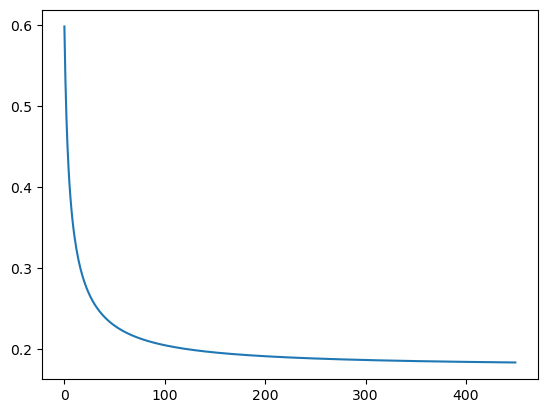

In [37]:
fig, ax = plt.subplots()
ax.plot(J_history)

Lets see the accurace of our prediction using this model

In [38]:
# Normalize the test data
y = (X_test - train_mean) / train_std

f_wb, g = logistic_regression.predict(X_test, w, b)
print(y_test.shape, f_wb.shape)
accurace = np.mean(np.where(f_wb == y_test, 1, 0))
print(accurace)

(27,) (27,)
0.4444444444444444


## Linear model with all the parameter **conclusion**
As shown above, the model using all the parameters and just linear components have a low accurace of just 0.44, lets study the parameter to increase the prediction accurace.

Lets see the features used in our prediction:

In [39]:
print(header)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
